## Make the label of cell in Kevin's format
- if cell doesn't divide, label be consistent through frames
- if cell divide, sisters have new adjacent labels

In [ ]:
from bactrack.core import compute_hierarchy
dir = "/Users/sherryyang/Documents/wiggins-lab/debug_phase"
hier_arr = compute_hierarchy(dir, submodel= 'bact_phase_omni')

import bactrack.core as core
nodes, edges = core.run_tracking(hier_arr, solver_name = 'mip_solver')

In [2]:
import bactrack.io as io
masks, edges_df =  io.format_output(hier_arr, nodes, edges, label_format = "kevin")

In [3]:
import pandas as pd
hier_df = io.hiers_to_df(hier_arr)
merged_df = pd.merge(edges_df, hier_df.add_suffix('_source'), left_on='Source Index', right_on='index_source', how='left')
merged_df = pd.merge(merged_df, hier_df.add_suffix('_target'), left_on='Target Index', right_on='index_target', how='left')

In [20]:
filtered_df = merged_df[["label_source", "label_target"]].astype(int)

# Kevin's txt file only need record division information, so filter them out 
result = filtered_df[filtered_df["label_source"] != filtered_df["label_target"]] 
result.head(10)

,label_source,label_target
61,1,10
62,1,11
64,2,12
65,2,13
136,13,17
137,13,18
138,10,15
139,10,16
140,11,19
141,11,20


Output to txt file 

In [21]:
import pandas as pd
import csv

output_file = 'output.txt' # change this
result.to_csv(output_file, header=False, index=False, sep=',', quoting=csv.QUOTE_NONE)


You could also check the pants in below:

In [22]:
# Install napari if you havn't
! pip install napari

  Using cached napari-0.4.19.post1-py3-none-any.whl.metadata (15 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached cachey-0.2.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached magicgui-0.8.2-py3-none-any.whl.metadata (7.2 kB)
  Using cached napari_console-0.0.9-py3-none-any.whl.metadata (3.5 kB)
  Using cached napari_plugin_engine-0.2.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached napari_svg-0.1.10-py3-none-any.whl.metadata (3.5 kB)
  Using cached Pint-0.23-py3-none-any.whl.metadata (8.1 kB)
  Using cached PyOpenGL-3.1.7-py3-none-any.whl.metadata (3.2 kB)
  Using cached vispy-0.14.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (8.3 kB)
  Using cached HeapDict-1.0.1-py3-none-any.whl.metadata (1.9 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.34.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.1

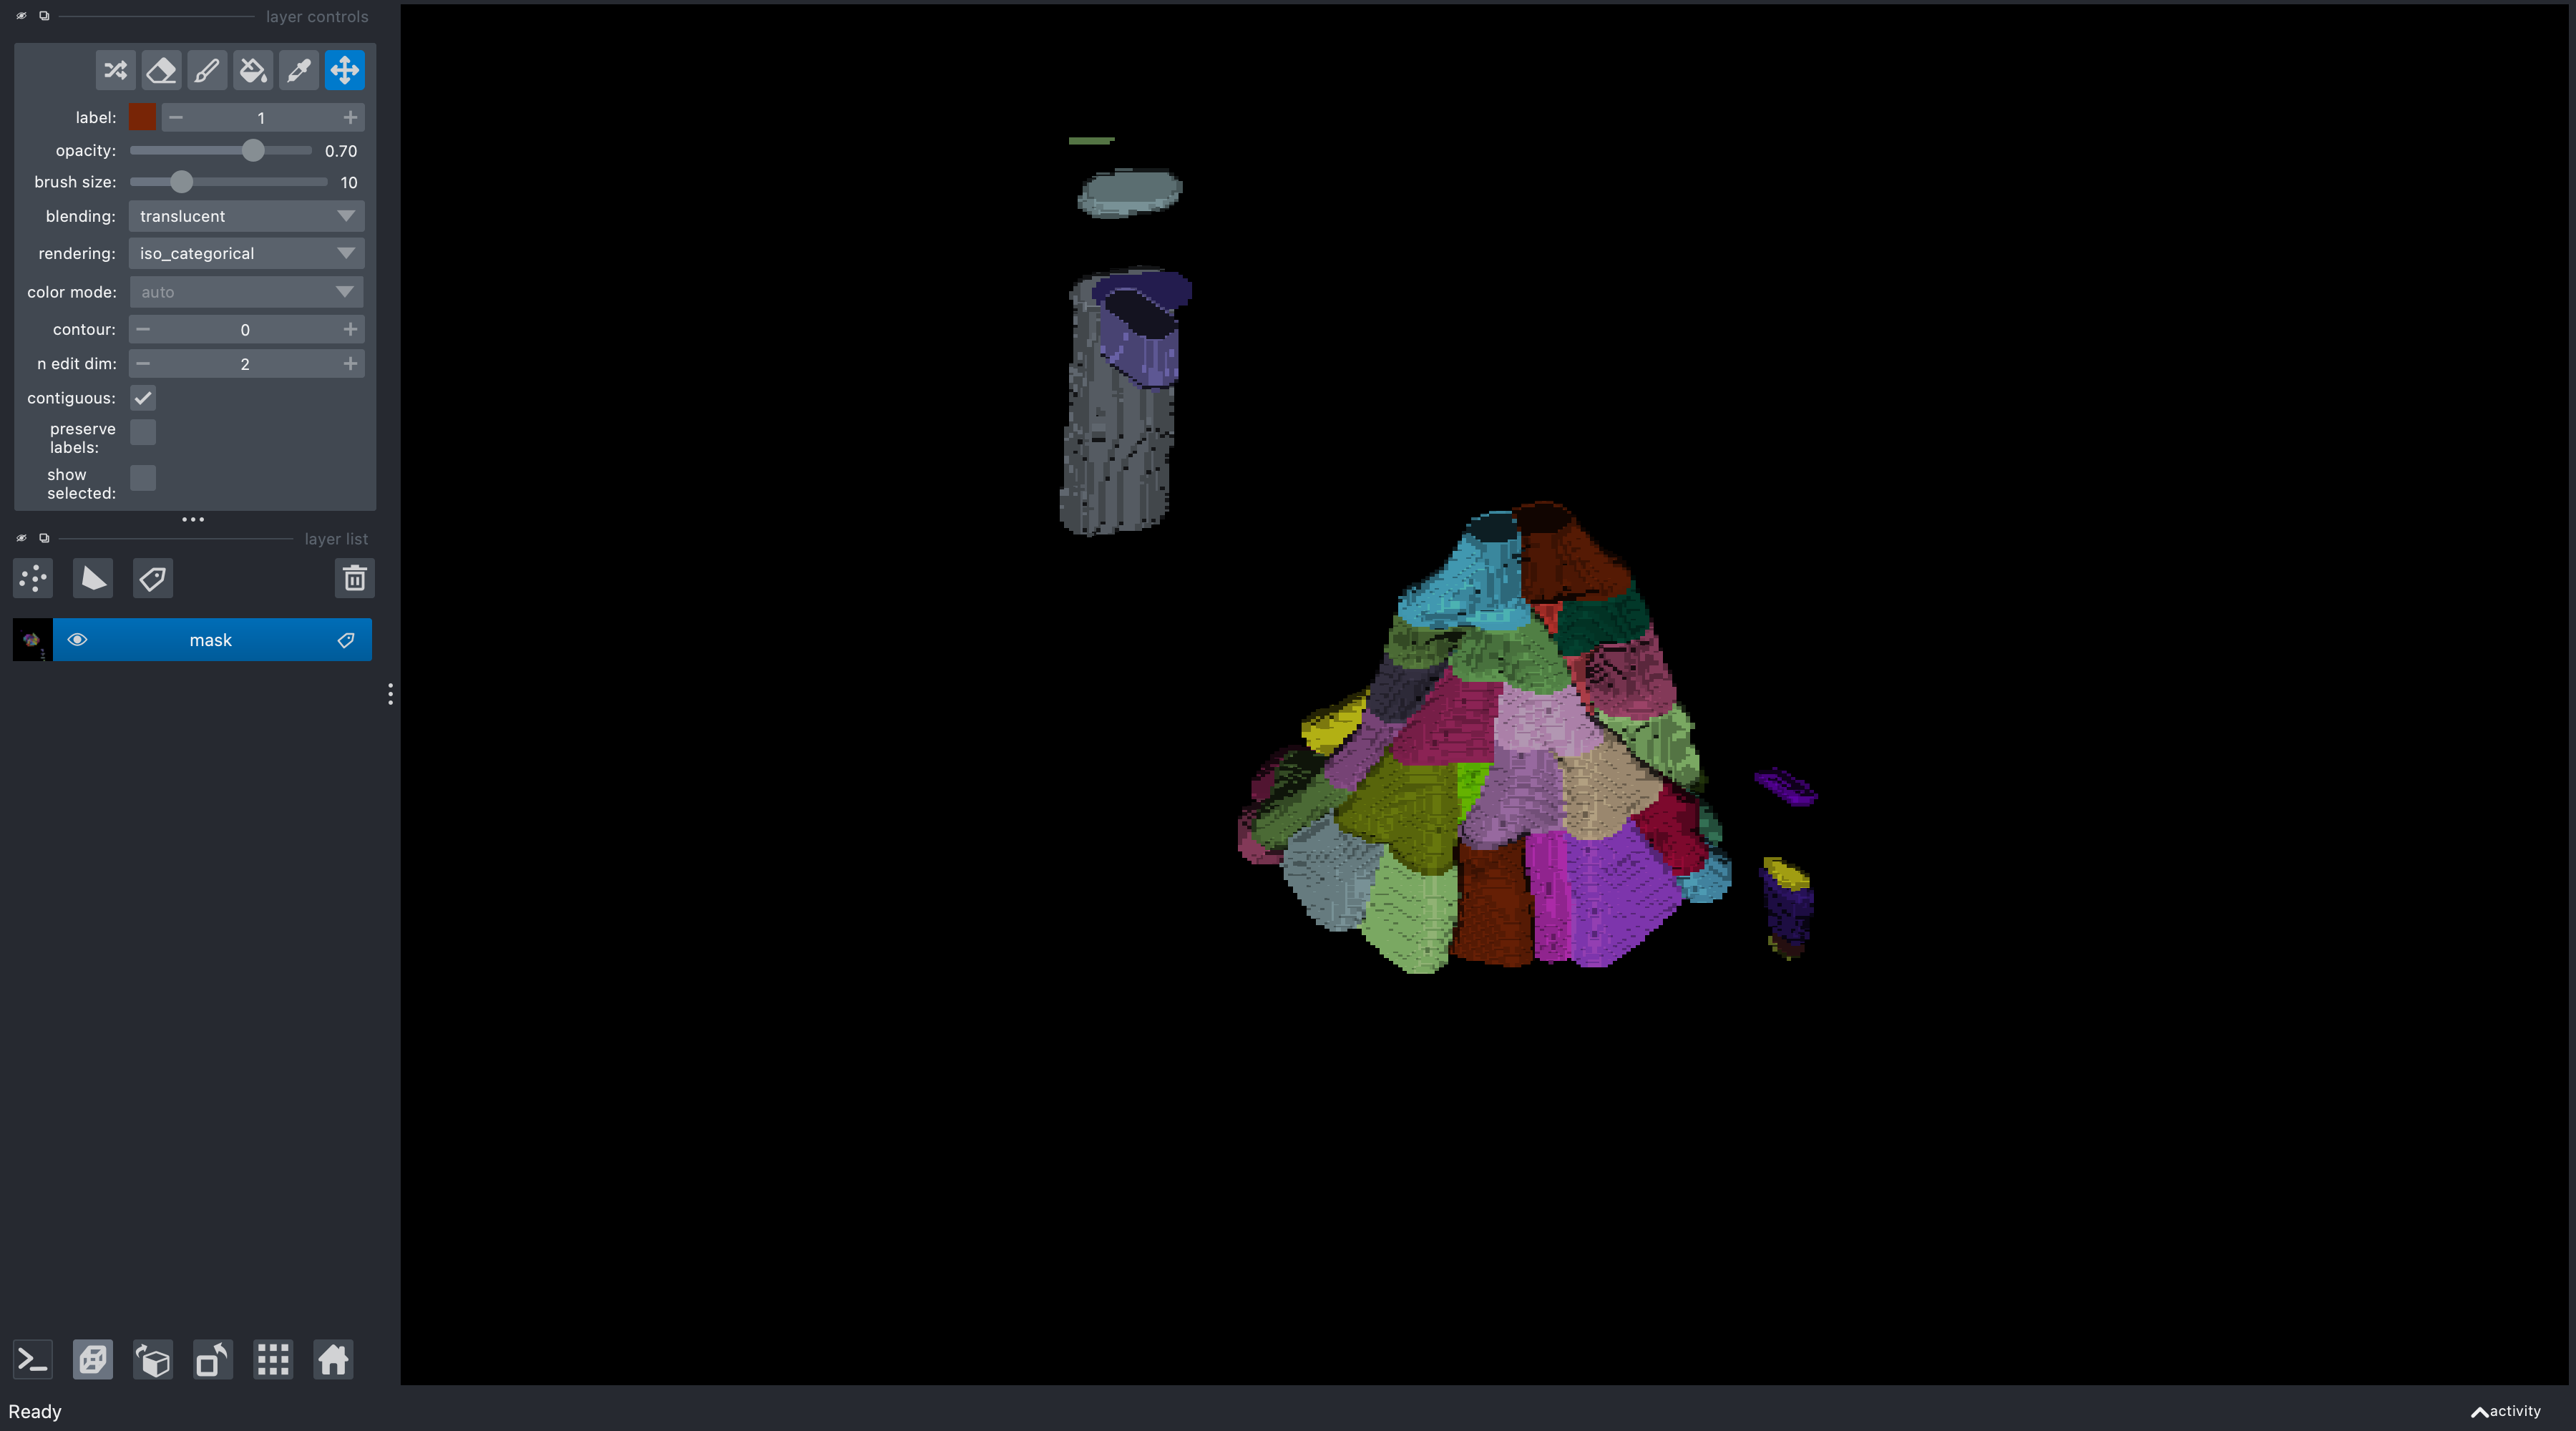

In [38]:

import napari
from napari.utils.notebook_display import nbscreenshot
import numpy as np

masks_int = [mask.astype(np.uint32) for mask in masks]
masks_3d = np.stack(masks_int, axis=0)

viewer = napari.Viewer()
viewer.window.resize(1800, 1000)
layers = viewer.add_labels(masks_3d, name="mask")
viewer.dims.ndisplay = 3
viewer.camera.angles=(-180,0,45)
display(nbscreenshot(viewer))
